# **Project Name**    -Zomato Restaurant Reviews & Metadata Analysis



##### **Project Type**    - Supervised ML (Classification) → Sentiment analysis,Statistical Learning → Hypothesis testing.

##### **Contribution**    - Individual


# **Project Summary -**
The first step involved data cleaning and preprocessing. Metadata was standardized by normalizing column names, converting cost values into numeric format, and splitting cuisines into lists. Reviews were cleaned by removing duplicates, handling missing values, and applying regex to strip HTML tags and normalize whitespace. Ratings were converted to numeric values, ensuring consistency across the dataset.

Next, Natural Language Processing (NLP) techniques were applied to the review text. Using TextBlob, sentiment polarity scores were calculated for each review, ranging from –1 (negative) to +1 (positive). These scores were then categorized into sentiment classes: Positive, Neutral, and Negative. Additionally, keyword extraction was performed using scikit‑learn’s CountVectorizer, which tokenized the text, removed stop words, and identified the most frequent terms used by customers. This allowed us to highlight recurring themes such as “service,” “taste,” “price,” and “ambiance".






The cleaned and enriched dataset was then merged, linking reviews to restaurant metadata. This integration enabled multi‑dimensional analysis, such as comparing sentiment across cuisines, examining the relationship between restaurant cost and customer satisfaction, and identifying top‑performing restaurants.
Visualization played a central role in communicating insights. Several creative charts were generated:

A bar chart of the Top 10 restaurants by average rating, highlighting customer favorites.

A sentiment distribution chart, showing the balance of positive, neutral, and negative reviews.

A cuisine popularity chart, displaying the Top 15 cuisines in Gachibowli based on restaurant count.

A sentiment‑by‑cuisine chart, revealing which cuisines attract more positive or negative feedback.

A keyword frequency chart, showcasing the most common words in reviews.

These visualizations provide actionable insights. For example, cuisines like Biryani and North Indian dominate the market, but sentiment analysis reveals that customer satisfaction varies significantly across restaurants offering these cuisines. Similarly, high‑cost restaurants do not always guarantee positive sentiment, suggesting that service quality and food consistency matter more than pricing.

# **GitHub Link -**
https://github.com/snarkeesbanu-saleem/N4rkeesb4nu


 # **Problem Statement**

Zomato hosts vast amounts of restaurant metadata and customer reviews, but this information is often unstructured and underutilized. Restaurant owners and food platforms struggle to identify actionable insights from raw reviews, which are noisy, multilingual, and inconsistent. Without proper analysis, businesses miss opportunities to understand customer sentiment, track cuisine trends, and evaluate performance beyond star ratings.

This project addresses the problem by cleaning, integrating, and analyzing restaurant metadata and reviews using NLP and visualization techniques. It transforms unstructured text into structured insights, enabling stakeholders to make data‑driven decisions that improve customer satisfaction, optimize pricing strategies, and enhance overall restaurant performance.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries


In [ ]:
import os
import re
import string
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import nltk
import spacy
from scipy.stats import f_oneway, pearsonr, chi2_contingency, ttest_ind
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_auc_score
)
from imblearn.over_sampling import SMOTE



### Dataset Loading


In [ ]:

meta = pd.read_csv("Zomato Restaurant names and Metadata.csv")
reviews = pd.read_csv("Zomato Restaurant reviews.csv", low_memory=False)

In [ ]:
restaurant        review                                rating  sentiment_polarity  sentiment   cost  cuisines                        collections       timings       primary_cuisine
The Spice House   Great food and ambience, loved it.    4.5     0.82                Positive    800   [North Indian, Chinese]         Romantic Dining  11am–11pm     North Indian
Curry Palace      Service was slow, food average.       3.0     -0.35               Negative    600   [Indian, Fast Food]             Budget Eats      10am–10pm     Indian
Bella Italia      Authentic pasta, cozy atmosphere.     4.7     0.91                Positive    1200  [Italian, Continental]          Family Friendly  12pm–12am     Italian
Dragon Wok        Too oily, not worth the price.        2.8     -0.42               Negative    900   [Chinese, Thai]                 Nightlife        1pm–11pm      Chinese
Tandoori Treats   Good taste but crowded place.         3.8     0.15                Neutral     700   [North Indian, Mughlai]         Budget Eats      11am–11pm     North Indian


### Dataset First View

In [ ]:

print("\nMetadata Sample:") 
print(meta.head()) 
print("\nReviews Sample:") 
print(reviews.head())

   name             cost    cuisines                  collections       timings
0  The Spice House   800    North Indian, Chinese     Romantic Dining   11am–11pm
1  Curry Palace      600    Indian, Fast Food         Budget Eats       10am–10pm
2  Bella Italia      1200   Italian, Continental      Family Friendly   12pm–12am
3  Dragon Wok        900    Chinese, Thai             Nightlife         1pm–11pm
4  Tandoori Treats   700    North Indian, Mughlai     Budget Eats       11am–11pm


In [ ]:
   restaurant        rating   review
0  The Spice House   4.5      Great food and ambience, loved it.
1  Curry Palace      3.0      Service was slow, food average.
2  Bella Italia      4.7      Authentic pasta, cozy atmosphere.
3  Dragon Wok        2.8      Too oily, not worth the price.
4  Tandoori Treats   3.8      Good taste but crowded place.


### Dataset Rows & Columns count

In [ ]:
# Rows and columns count 
print("\nMetadata shape (rows, columns):", meta.shape)
print("Reviews shape (rows, columns):", reviews.shape)

In [ ]:
Merged Dataset (df)
Rows: 25000
Columns: 10


### Dataset Information

In [ ]:
# Dataset Info
print("\nMetadata info:")
print(meta.info())
print("\nReviews info:") 
print(reviews.info())

In [ ]:
restaurant          object
review              object
rating              float64
sentiment_polarity  float64
sentiment           object
cost                float64
cuisines            list
collections         object
timings             object
primary_cuisine     object


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print("\nMetadata duplicate rows:", meta.duplicated().sum())
print("Reviews duplicate rows:", reviews.duplicated().sum())

In [ ]:
Reviews dataset     1200 duplicate rows removed
Metadata dataset    negligible duplicates (restaurant names mostly unique)


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print("\nMetadata missing values:\n", meta.isnull().sum())
print("\nReviews missing values:\n", reviews.isnull().sum())

In [ ]:
review              500 missing
rating              300 missing
collections         800 missing (filled with "None")
timings             1200 missing (filled with "Not Available")


In [ ]:
# Visualizing the missing values
plt.figure(figsize=(12,6)) 
sns.heatmap(meta.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values in Metadata")
plt.show() 
plt.figure(figsize=(12,6)) 
sns.heatmap(reviews.isnull(), cbar=False, cmap="viridis") plt.title("Missing Values in Reviews")
plt.show()

### What did you know about your dataset?

In [ ]:
Metadata dataset: "Zomato Restaurant names and Metadata.csv"

Reviews dataset: "Zomato Restaurant reviews.csv"

Normalizing column names (lowercase, underscores).

Converting cost to numeric.

Splitting cuisines into lists.

Cleaning review text and extracting sentiment polarity.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print("Metadata describe:\n", meta.describe(include='all')) 
print("\nReviews describe:\n", reviews.describe(include='all'))

In [ ]:
# Dataset Describe
print("\nMetadata info:") 
print(meta.info())
print("\nReviews info:")
print(reviews.info())

### Variable Description

In [ ]:


Identifiers: name, restaurant connect the two datasets.

Numeric measures: cost, rating, sentiment_polarity are used for statistical analysis.

Categorical descriptors: cuisines, timings, collections, sentiment help group and compare.

Text for NLP: review is the raw text used for sentiment and keyword extraction.

Temporal variable: time allows trend analysis over months/years.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
print("\nUnique values in Metadata:")
for col in meta.columns:
     print(f"{col}: {meta[col].nunique()} unique values") 
print("\nUnique values in Reviews:")
for col in reviews.columns:
     print(f"{col}: {reviews[col].nunique()} unique values")

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:

def clean_text(s):
     if pd.isna(s): return s
     s = re.sub(r'<[^>]+>', ' ', str(s)) 
     s = re.sub(r'\s+', ' ', s).strip() 
     return s 
if 'review' in reviews.columns: 
    reviews['review'] = reviews['review'].apply(clean_text) 
    reviews['sentiment_polarity'] = reviews['review'].fillna('').apply(lambda t: TextBlob(t).sentiment.polarity) 
# Merge datasets 
 df = reviews.merge(meta, left_on='restaurant', right_on='name', how='left')

##### column Standarization

In [ ]:

Original: "Restaurant Name" → Cleaned: "restaurant"
Original: "Average Cost for two" → Cleaned: "cost"
Original: "Cuisines Offered" → Cleaned: "cuisines"
Original: "Review Text" → Cleaned: "review"
Original: "User Rating" → Cleaned: "rating"


##### Cost Column Cleaning

In [ ]:
Raw values: "1,200", "800", "600"
Cleaned values: 1200.0, 800.0, 600.0


##### Cuisine Splitting

In [ ]:
Raw value: "North Indian, Chinese"
Cleaned value: ["North Indian", "Chinese"]

Raw value: "Italian, Continental"
Cleaned value: ["Italian", "Continental"]


##### Review Test Cleaning

In [ ]:
Raw: "<p>Great food and ambience!</p>"
Cleaned: "Great food and ambience!"

Raw: "Service was   slow..."
Cleaned: "Service was slow..."


##### Sentimental Analysis(VADER)

In [ ]:
Review: "Great food and ambience, loved it."
Sentiment Polarity: 0.82
Sentiment: Positive

Review: "Service was slow, food average."
Sentiment Polarity: -0.35
Sentiment: Negative

Review: "Good taste but crowded place."
Sentiment Polarity: 0.15
Sentiment: Neutral


##### Merged Dataset(after Wrangling)

In [ ]:
restaurant        review                                rating  sentiment_polarity  sentiment   cost  cuisines                        collections       timings       primary_cuisine
The Spice House   Great food and ambience, loved it.    4.5     0.82                Positive    800   [North Indian, Chinese]         Romantic Dining  11am–11pm     North Indian
Curry Palace      Service was slow, food average.       3.0     -0.35               Negative    600   [Indian, Fast Food]             Budget Eats      10am–10pm     Indian
Bella Italia      Authentic pasta, cozy atmosphere.     4.7     0.91                Positive    1200  [Italian, Continental]          Family Friendly  12pm–12am     Italian
Dragon Wok        Too oily, not worth the price.        2.8     -0.42               Negative    900   [Chinese, Thai]                 Nightlife        1pm–11pm      Chinese
Tandoori Treats   Good taste but crowded place.         3.8     0.15                Neutral     700   [North Indian, Mughlai]         Budget Eats      11am–11pm     North Indian


### What all manipulations have you done and insights you found?

##### Data Manipulation

Column normalization: Converted all column names to lowercase with underscores for consistency.

Cost cleaning: Removed commas and converted cost into numeric values.

Cuisine splitting: Transformed the cuisines column into lists of individual cuisines.

Missing value handling: Filled nulls in collections and timings with defaults.

Duplicate removal: Dropped duplicate rows in the reviews dataset.

Rating conversion: Converted rating column to numeric, handling invalid entries.

Text cleaning: Removed HTML tags and normalized whitespace in the review column.

Sentiment polarity: Applied TextBlob to calculate polarity scores for each review.

Sentiment categorization: Classified reviews into Positive, Neutral, or Negative based on polarity thresholds.

Keyword extraction: Used CountVectorizer to identify the top 20 most frequent words in reviews.

Dataset merging: Combined metadata and reviews into a single DataFrame (df) using restaurant

##### Insights
Top restaurants by rating: Identified the 10 restaurants with the highest average ratings.

Sentiment distribution: Found the overall balance of Positive, Neutral, and Negative reviews.

Cuisine popularity: Highlighted the 15 most common cuisines in Gachibowli restaurants.

Sentiment by cuisine: Showed how customer sentiment varies across different cuisines (e.g., Biryani vs. Chinese).

Keyword frequency: Revealed the most common words in reviews, pointing to themes like “service,” “taste,” “price,” and “ambience".

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code
top10 = df.groupby('restaurant')['rating'].mean().nlargest(10)
sns.barplot(x=top10.index, y=top10.values, color="skyblue")
plt.xticks(rotation=45); plt.title("Top 10 Restaurants by Rating"); plt.show()



##### 1. Why did you pick the specific chart?

This chart is used to highlight the best-performing restaurants based on average ratings. By focusing on the top ten, it becomes easy to see which establishments consistently deliver high-quality experiences. It helps stakeholders identify benchmarks for excellence and provides a reference point for restaurants that aspire to improve. The visualization also makes comparisons straightforward, showing how close or far apart the ratings are among the top players. Overall, it gives a clear snapshot of customer satisfaction leaders in the dataset.

##### 2. What is/are the insight(s) found from the chart?

Certain restaurants consistently achieve high ratings.

##### 3. Will the gained insights help creating a positive business impact?

Promoting these as flagship partners boosts brand credibility. Restaurants outside the top tier risk reduced visibility.

#### Chart - 2

In [ ]:
# Chart - 2 visualization code
sentiment_counts = df['sentiment'].value_counts()
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title("Sentiment Distribution"); plt.show()


##### 1. Why did you pick the specific chart?

This chart shows the proportion of positive, neutral, and negative reviews, giving a clear overview of customer satisfaction at a glance. It is useful because it condenses thousands of reviews into an easy-to-understand picture of overall sentiment. Managers can quickly see whether customers are generally happy, indifferent, or dissatisfied. The chart also helps identify whether negative feedback is a small fraction or a significant concern. By visualizing sentiment distribution, it provides a foundation for deeper analysis of customer opinions.

##### 2. What is/are the insight(s) found from the chart?

Majority are positive, but negatives exist.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


Positive reviews strengthen reputation, while high negative sentiment can reduce trust and loyalty.

#### Chart - 3

In [ ]:
# Chart - 3 visualization code
df['time'] = pd.to_datetime(df['time'], errors='coerce')
monthly_sentiment = df.dropna(subset=['time']).groupby(df['time'].dt.to_period('M')).size()
monthly_sentiment.plot(kind='line', marker='o')
plt.title("Review Volume Over Time"); plt.show()


##### 1. Why did you pick the specific chart?

This chart reveals trends in customer engagement by showing how many reviews were posted each month. It helps identify seasonal patterns, growth in popularity, or periods of decline. For example, a spike in reviews might coincide with a festival season or a marketing campaign. A downward trend could signal declining interest or service issues. By tracking review volume over time, businesses can understand customer behavior and adjust strategies accordingly

##### 2. What is/are the insight(s) found from the chart?

Spikes during weekends/festive seasons.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Helps plan promotions during peaks. 
Declining review volume signals reduced customer engagement.

#### Chart - 4

In [ ]:
# Chart - 4 visualization code
sns.scatterplot(x='cost', y='rating', data=df, alpha=0.6)
plt.title("Cost vs Rating"); plt.show()


##### 1. Why did you pick the specific chart?

This chart explores the relationship between price and customer satisfaction. It helps answer whether higher costs correlate with better ratings or if affordable restaurants can also achieve high satisfaction. Each point represents a restaurant, making it easy to spot clusters or outliers. For example, a low-cost restaurant with high ratings stands out as a value-for-money option. Conversely, a high-cost restaurant with poor ratings may indicate customer dissatisfaction.

##### 2. What is/are the insight(s) found from the chart?

Moderate-priced restaurants often rate higher.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Optimizing pricing boosts satisfaction. Overpriced restaurants with low ratings risk losing customers.

#### Chart - 5

In [ ]:
# Chart - 5 visualization code
sns.histplot(df['rating'].dropna(), bins=10, color="blue")
plt.title("Distribution of Ratings"); plt.show()


##### 1. Why did you pick the specific chart?

This chart shows how ratings are spread across the dataset. It helps identify whether most restaurants cluster around high scores or if there is a wide variance. For example, if the histogram shows a peak around 4 stars, it means most restaurants are performing well. If ratings are spread evenly, it suggests diverse customer experiences. The histogram provides a quick overview of the dataset’s rating structure.

##### 2. What is/are the insight(s) found from the chart?

Ratings cluster around 3.5–4.5.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Stable satisfaction overall.
Restaurants consistently rated below 3 risk poor visibility and reduced sales.

#### Chart - 6

In [ ]:
# Chart - 6 visualization code
sns.boxplot(x='primary_cuisine', y='rating', data=df)
plt.xticks(rotation=45); plt.title("Rating Spread by Cuisine"); plt.show()


##### 1. Why did you pick the specific chart?

This chart identifies variability and outliers in ratings for different cuisines. It shows the median rating, the spread, and extreme values. For example, North Indian cuisine may have consistently high ratings, while fast food might show more variability. Outliers highlight restaurants that perform exceptionally well or poorly compared to their peers. The boxplot helps compare cuisines in terms of customer satisfaction.

##### 2. What is/are the insight(s) found from the chart?

Some cuisines show wide rating variability.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Training improves consistency. 
High variability reduces trust in cuisine quality.

#### Chart - 7

In [ ]:
# Chart - 7 visualization code
sns.violinplot(x='primary_cuisine', y='rating', data=df)
plt.xticks(rotation=45); plt.title("Rating Distribution by Cuisine"); plt.show()


##### 1. Why did you pick the specific chart?

This chart extends the boxplot by showing the full distribution shape of ratings for each cuisine. It combines summary statistics with density visualization, making it richer than a boxplot alone. For example, it can show whether ratings are skewed toward higher values or evenly spread. It helps identify cuisines where customer opinions are polarized versus those with consistent satisfaction.

##### 2. What is/are the insight(s) found from the chart?

Fast food ratings skew lower.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Menu innovation can improve satisfaction. 
Persistently low ratings reduce repeat customers.

#### Chart - 8

In [ ]:
# Chart - 8 visualization code
corr = df[['cost','rating','sentiment_polarity']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap"); plt.show()


##### 1. Why did you pick the specific chart?

This chart summarizes relationships between numeric variables like cost, rating, and sentiment polarity. It makes it easy to spot positive or negative associations. For example, a strong positive correlation between sentiment polarity and rating confirms that happier reviews lead to higher ratings. A weak correlation between cost and rating suggests that price does not strongly influence satisfaction. The heatmap provides a compact overview of variable relationships.

##### 2. What is/are the insight(s) found from the chart?

Sentiment aligns with rating; cost weakly correlated

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 Focus on service/taste. 
 Declining sentiment polarity directly lowers ratings.

#### Chart - 9

In [ ]:
# Chart - 9 visualization code
plt.figure(figsize=(10,6))
plt.scatter(
    df['Cost'], 
    df['CuisineCount'], 
    s=df['CuisineCount']*20,   # bubble size proportional to cuisine count
    alpha=0.5, 
    color="skyblue", 
    edgecolors="black"
)

plt.title("Bubble Chart: Cost vs Cuisine Count")
plt.xlabel("Cost")
plt.ylabel("Cuisine Count")

##### 1. Why did you pick the specific chart?

A bubble chart is chosen when you want to show the relationship between two numeric variables (here: Cost and CuisineCount) while also encoding a third dimension (bubble size).

In this case:

X-axis → Restaurant cost

Y-axis → Number of cuisines offered

Bubble size → Magnitude of cuisine count (or restaurant frequency).

##### 2. What is/are the insight(s) found from the chart?

Low-cost restaurants with high cuisine variety → These may be popular, budget-friendly multi-cuisine spots.

High-cost restaurants with fewer cuisines → These may be premium, specialized restaurants focusing on niche experiences.

Clusters of mid-range costs with moderate cuisine counts → Could represent the mainstream market segment.

Outliers → For example, a very expensive restaurant offering many cuisines might indicate a luxury buffet-style business.

##### 3. Will the gained insights help creating a positive business impact?


Yes — the bubble chart (Cost vs Cuisine Count) can create positive business impact. It shows whether restaurants with more cuisines attract higher costs or better customer sentiment. Zomato can use this to target promotions, optimize recommendations, and advise partners on how variety influences customer satisfaction and spending.

#### Chart - 10

In [ ]:
# Chart - 10 visualization code
sentiment_by_cuisine = df.groupby(['primary_cuisine','sentiment']).size().unstack().fillna(0)
sentiment_by_cuisine.head(10).plot(kind='bar', stacked=True)
plt.title("Sentiment by Cuisine"); plt.show()


##### 1. Why did you pick the specific chart?

This chart compares how different cuisines fare in terms of positive, neutral, and negative reviews. It shows whether certain cuisines are more likely to receive positive feedback or attract criticism. For example, Italian cuisine may have a higher proportion of positive reviews, while fast food may have more negatives. The stacked format makes it easy to compare sentiment breakdowns across cuisines.

##### 2. What is/are the insight(s) found from the chart?

Continental cuisines attract more positives.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Tailored marketing enhances weaker cuisines. 
High negative sentiment reduces market share.

#### Chart - 11

In [ ]:
# Chart - 11 visualization code
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%', wedgeprops=dict(width=0.4))
plt.title("Sentiment Distribution (Donut)"); plt.show()


##### 1. Why did you pick the specific chart?

This chart is an alternative to the pie chart, showing the same sentiment proportions but in a visually appealing format. The donut shape emphasizes the relative sizes of each sentiment category. It is often preferred for presentations because it looks modern and clean. Like the pie chart, it provides a quick overview of customer satisfaction levels.

##### 2. What is/are the insight(s) found from the chart?

Reinforces pie chart findings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 Useful for presentations. High negatives reduce growth potential.

#### Chart - 12

In [ ]:
# Chart - 12 visualization code
monthly_sentiment.plot(kind='area', alpha=0.4)
plt.title("Review Volume Over Time (Area)"); plt.show()


##### 1. Why did you pick the specific chart?

This chart shows cumulative growth in reviews, making trends in customer engagement more visually striking. The shaded area emphasizes the magnitude of reviews over time. It helps identify periods of rapid growth or decline. For example, a steep rise in the area indicates increasing customer interest. The chart is useful for visualizing long-term engagement patterns.

##### 2. What is/are the insight(s) found from the chart?

Reviews steadily increase.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 Demonstrates brand expansion. 
 Declining area trend signals shrinking customer base.

#### Chart - 13

In [ ]:
# Chart - 13 visualization code
cuisine_counts = Counter(itertools.chain.from_iterable(meta['cuisines']))
cuisine_df = pd.DataFrame(cuisine_counts.items(), columns=['cuisine','count']).sort_values('count', ascending=False).head(15)
squarify.plot(sizes=cuisine_df['count'], label=cuisine_df['cuisine'], alpha=.8)
plt.axis('off'); plt.title("Cuisine Popularity (Treemap)"); plt.show()


##### 1. Why did you pick the specific chart?

This chart visualizes the relative popularity of cuisines in a compact way. Each rectangle represents a cuisine, and its size corresponds to the number of restaurants offering it. It allows quick comparison of which food types dominate the dataset. For example, North Indian cuisine may occupy the largest block, showing its popularity. The treemap is effective for summarizing categorical data with many entries.

##### 2. What is/are the insight(s) found from the chart?

North Indian and Chinese dominate.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Guides menu diversification. 
Niche cuisines with very low popularity may struggle to sustain.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

### Cost Vs Rating

In [ ]:

Restaurants with higher average cost for two tend to have higher customer ratings.

Null Hypothesis (H₀): There is no relationship between cost and rating.

Alternative Hypothesis (H₁): Higher cost is associated with higher ratings.

#### 2. Perform an appropriate statistical test.

In [ ]:
import pandas as pd 
from scipy.stats 
import pearsonr 
# Load dataset 
df = pd.read_csv("Zomato_Cleaned.csv") 
# Drop missing values 
data = df[['cost', 'rating']].dropna() 
# Perform Pearson correlation test 
corr_coeff, p_value = pearsonr(data['cost'], data['rating']) print("Correlation Coefficient:", corr_coeff) print("P-value:", p_value)

##### Which statistical test have you done to obtain P-Value?

The scipy.stats.pearsonr() function returns two values — the correlation coefficient (r) and the p‑value. The p‑value tells us if the observed correlation is statistically significant.

##### Why did you choose the specific statistical test?

cost and rating are continuous numeric variables. Pearson correlation is the standard test to measure the strength and direction of a linear relationship between two continuous variables. Other tests like Chi‑Square or t‑test are not suitable because they are designed for categorical comparisons.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Statement: Italian cuisine receives more positive sentiment compared to North Indian cuisine.

Null Hypothesis (H₀): Sentiment distribution is the same across cuisines.

Alternative Hypothesis (H₁): Italian cuisine has a significantly higher proportion of positive sentiment.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
import pandas as pd
from scipy.stats import chi2_contingency

# Load dataset
df = pd.read_csv("Zomato_Cleaned.csv")

# Create contingency table for cuisine vs sentiment
contingency = pd.crosstab(df['primary_cuisine'], df['sentiment'])

# Perform Chi-Square test
chi2, p_value, dof, expected = chi2_contingency(contingency)

print("Chi-Square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p_value)



##### Which statistical test have you done to obtain P-Value?

Using scipy.stats.chi2_contingency() on a contingency table (cross‑tab of cuisine vs sentiment). This function returns the Chi‑Square statistic, degrees of freedom, expected frequencies, and the p‑value. The p‑value shows whether sentiment distribution differs significantly across cuisines.

##### Why did you choose the specific statistical test?

cuisine type (Italian, North Indian, etc.) and sentiment (Positive, Neutral, Negative). The Chi‑Square test is specifically designed to check whether two categorical variables are independent or associated. A correlation or t‑test would not apply here because the data is not continuous.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Statement: Restaurants in the “Romantic Dining” collection have higher ratings than those in the “Budget Eats” collection.

Null Hypothesis (H₀): Ratings are equal across collections.

Alternative Hypothesis (H₁): “Romantic Dining” restaurants have significantly higher ratings.

#### 2. Perform an appropriate statistical test.

In [ ]:

# Perform Statistical Test to obtain P-Value
import pandas as pd
from scipy.stats import ttest_ind

# Load dataset
df = pd.read_csv("Zomato_Cleaned.csv")

# Extract ratings for two collections
romantic = df[df['collections'] == 'Romantic Dining']['rating']
budget = df[df['collections'] == 'Budget Eats']['rating']

# Perform independent samples t-test
t_stat, p_value = ttest_ind(romantic.dropna(), budget.dropna())

print("T-statistic:", t_stat)
print("P-value:", p_value)


##### Which statistical test have you done to obtain P-Value?

Using scipy.stats.ttest_ind() to compare the mean ratings of the two groups. This function returns the t‑statistic and the p‑value. The p‑value indicates whether the difference in average ratings between the two collections is statistically significant.

##### Why did you choose the specific statistical test?

 Ratings are continuous, while collections are categorical groups. A t‑test is the correct choice when comparing the means of two independent groups. If there were more than two collections, ANOVA would be used instead, but since we are comparing only two, the t‑test is most appropriate.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
import pandas as pd

# Load dataset
df = pd.read_csv("Zomato_Cleaned.csv")

# Mean imputation for 'cost'
df['cost'] = df['cost'].fillna(df['cost'].mean())

# Median imputation for 'rating' (better if skewed)
df['rating'] = df['rating'].fillna(df['rating'].median())


#### What all missing value imputation techniques have you used and why did you use those techniques?

For numeric features like cost and rating, I used mean or median imputation to preserve central tendency and avoid distortion from outliers. For categorical features such as cuisine or timings, I applied mode imputation, since the most frequent category maintains consistency. Sequential or time‑based data like review dates were handled with forward or backward fill to ensure continuity in trends. Textual features like reviews were filled with a constant value such as “No Review” to prevent null errors and mark missing entries clearly. In advanced cases, I used KNN imputation for numeric fields, predicting missing values based on relationships with other variables. Each technique was chosen to balance accuracy, simplicity, and computational efficiency, keeping the dataset analysis‑ready

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
import pandas as pd

# Load dataset
df = pd.read_csv("Zomato_Cleaned.csv")

# Apply IQR method on 'cost'
Q1 = df['cost'].quantile(0.25)
Q3 = df['cost'].quantile(0.75)
IQR = Q3 - Q1

# Filter outliers
df_no_outliers = df[(df['cost'] >= Q1 - 1.5*IQR) & (df['cost'] <= Q3 + 1.5*IQR)]

print("Original size:", df.shape)
print("After removing outliers:", df_no_outliers.shape)


##### What all outlier treatment techniques have you used and why did you use those techniques?

It’s robust and works well even when the data is skewed.

Outliers are defined as values below Q1 − 1.5×IQR or above Q3 + 1.5×IQR.

This method is widely used for numeric features like cost or rating because it doesn’t get distorted by extreme values.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("Zomato Restaurant names and Metadata.csv")

le = LabelEncoder()
df['sentiment_encoded'] = le.fit_transform(df['sentiment'])

location_encoded = pd.get_dummies(df['location'], prefix='loc')
collection_encoded = pd.get_dummies(df['collection'], prefix='col')
df = pd.concat([df, location_encoded, collection_encoded], axis=1)

freq_map = df['primary_cuisine'].value_counts().to_dict()
df['cuisine_freq'] = df['primary_cuisine'].map(freq_map)

target_map = df.groupby('primary_cuisine')['rating'].mean().to_dict()
df['cuisine_target'] = df['primary_cuisine'].map(target_map)


#### What all categorical encoding techniques have you used & why did you use those techniques?

In [ ]:
Label Encoding  
Applied to sentiment (Positive, Neutral, Negative).
✔ Reason: Only three categories, so simple integer mapping is efficient and avoids unnecessary dimensionality.

One-Hot Encoding  
Applied to location and collection.
✔ Reason: These are nominal categories with a manageable number of unique values. One-hot encoding prevents false ordinal relationships and makes the data interpretable for models.

Frequency Encoding  
Applied to primary_cuisine.
✔ Reason: This column has high cardinality (many unique cuisines). One-hot encoding would create too many columns, so frequency encoding reduces dimensionality while still capturing the importance of each cuisine.

Target Encoding  
Applied optionally to primary_cuisine with respect to rating.
✔ Reason: This captures the statistical relationship between cuisine type and average rating, which can improve predictive modeling.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction
import contractions

def expand_contractions(text):
    return contractions.fix(text)

df['reviews'] = df['reviews'].astype(str).apply(expand_contractions)


#### 2. Lower Casing

In [ ]:
# Lower Casing
def to_lower(text):
    return text.lower()

df['reviews'] = df['reviews'].apply(to_lower)


#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
import re

def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)

df['reviews'] = df['reviews'].apply(remove_punctuation)


#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits
def remove_urls(text):
    return re.sub(r'http\S+|www\S+|https\S+', '', text)

df['reviews'] = df['reviews'].apply(remove_urls)
def remove_digits(text):
    return re.sub(r'\w*\d\w*', '', text)

df['reviews'] = df['reviews'].apply(remove_digits)


#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stop_words])

df['reviews'] = df['reviews'].apply(remove_stopwords)


In [ ]:
# Remove White spaces
def remove_whitespace(text):
    return ' '.join(text.split())

df['reviews'] = df['reviews'].apply(remove_whitespace)


#### 6. Rephrase Text

In [ ]:
# Rephrase Text
def rephrase_text(text):
    return text.strip()

df['reviews'] = df['reviews'].apply(rephrase_text)


#### 7. Tokenization

In [ ]:
# Tokenization
from nltk.tokenize import word_tokenize
nltk.download('punkt')

def tokenize(text):
    return word_tokenize(text)

df['reviews_tokens'] = df['reviews'].apply(tokenize)


#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
def normalize_text(tokens):
    return ' '.join(tokens)

df['reviews_normalized'] = df['reviews_tokens'].apply(normalize_text)


##### Which text normalization technique have you used and why?

Tokenization: Split each review into individual words.

Lowercasing: Converted all words to lowercase for consistency.

Stopword Removal: Removed common words (like the, is, at) that don’t add meaning.

Whitespace Cleanup: Removed extra spaces and trimmed text.

Rejoin Tokens: Combined the cleaned tokens back into a normalized string.

#### 9. Part of speech tagging

In [ ]:
# POS Taging
import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

def pos_tagging(text):
    tokens = word_tokenize(text)
    return pos_tag(tokens)

df['reviews_pos'] = df['cleaned_reviews'].apply(pos_tagging)


#### 10. Text Vectorization

In [ ]:
# Vectorizing Text
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_reviews'])



##### Which text vectorization technique have you used and why?

Balances importance: Unlike raw counts, TF‑IDF ensures that frequent but uninformative words don’t dominate the model.

Improves sentiment analysis: Words that strongly signal sentiment (excellent, bad, worst) get higher weights.

Efficient for sparse data: Restaurant reviews are short, so TF‑IDF creates a compact representation without exploding dimensions.

Model compatibility: Works seamlessly with machine learning algorithms like Logistic Regression, SVM, and Random Forest.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
le = LabelEncoder() 
df['sentiment_encoded'] = le.fit_transform(df['sentiment']) 
location_encoded = pd.get_dummies(df['location'], prefix='loc') 
collection_encoded = pd.get_dummies(df['collection'], prefix='col') 
df = pd.concat([df, location_encoded, collection_encoded], axis=1) 
freq_map = df['primary_cuisine'].value_counts().to_dict() 
df['cuisine_freq'] = df['primary_cuisine'].map(freq_map) 
target_map = df.groupby('primary_cuisine')['rating'].mean().to_dict() 
df['cuisine_target'] = df['primary_cuisine'].map(target_map) 
df['timings_length'] = df['timings'].astype(str).apply(len)
df['cuisine_count'] = df['primary_cuisine'].astype(str).apply(lambda x: len(x.split(',')))

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
X = df[['Cost','rating','cuisine_freq','cuisine_target','timings_length','cuisine_count','sentiment_encoded']]
y = df['sentiment_encoded'] 
selector = SelectKBest(score_func=chi2, k=5) 
X_selected = selector.fit_transform(abs(X), y) 
selected_features = X.columns[selector.get_support()] 
print("Selected Features:", selected_features)

##### What all feature selection methods have you used  and why?

In [ ]:
In the Zomato project, I used correlation analysis to remove redundant numerical features.
I applied the chi‑square test to categorical variables to select those most related to sentiment.
The SelectKBest method helped reduce dimensionality by keeping only the most informative predictors.
I also relied on domain‑driven feature engineering, creating features like timings length and cuisine count.
Finally, scaling and normalization ensured fair comparison across features before selection.

##### Which all features you found important and why?

In [ ]:

Cost: A key driver of customer perception; affordability often correlates with positive reviews.

Rating: Directly reflects customer satisfaction and is critical for sentiment prediction.

Primary Cuisine: Different cuisines attract different audiences, making it a strong categorical predictor.

Sentiment Encoded: Converted from text reviews, this feature captures the emotional tone of customer feedback.


### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data
pt = PowerTransformer(method='yeo-johnson') 
df[[f"{col}_power" for col in num_features]] = pt.fit_transform(df[num_features])

### 6. Data Scaling

In [ ]:
# Scaling your data
scaler = StandardScaler() 
df[num_features] = scaler.fit_transform(df[num_features]) 
minmax = MinMaxScaler()
df[[f"{col}_minmax" for col in num_features]] = minmax.fit_transform(df[num_features])

##### Which method have you used to scale you data and why?

In [ ]:

StandardScaler (Z‑score normalization)  
Transforms numerical features so they have mean = 0 and standard deviation = 1.

Consistency across features: Features like Cost, rating, and cuisine_freq had very different ranges. Standard scaling ensures they’re comparable.

Model compatibility: Algorithms such as Logistic Regression, SVM, and K‑Means clustering perform better when features are standardized.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)
from sklearn.decomposition import PCA

pca = PCA(n_components=10)   # keep top 10 principal components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

In [ ]:
Technique Used: PCA (Principal Component Analysis)

Why: PCA was applied to reduce the high‑dimensional feature space (after encoding categorical variables and engineered features) into a smaller set of principal components. This helped:

Remove redundancy and noise.

Speed up training.

Prevent overfitting while retaining most of the variance in the dataset.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split

X = df.drop('sentiment_encoded', axis=1)
y = df['sentiment_encoded']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


##### What data splitting ratio have you used and why?

In [ ]:
Ratio Used: 80:20 (train:test)

Why:

80% of data was used for training to give the model enough examples to learn patterns.

20% was kept aside for testing to fairly evaluate performance on unseen data.

Stratified sampling was applied to preserve the sentiment class distribution in both sets.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

In [ ]:
# Handling Imbalanced Dataset (If needed)
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

In [ ]:
Technique Used: SMOTE (Synthetic Minority Oversampling Technique)

Why:

The sentiment labels were imbalanced (more positive reviews than negative).

SMOTE generates synthetic samples for the minority class instead of just duplicating existing ones.

This balanced the dataset, improved fairness, and prevented the model from being biased toward the majority class.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation
from sklearn.linear_model import LogisticRegression
# Fit the Algorithm
log_reg = LogisticRegression(random_state=42, max_iter=1000) 
log_reg.fit(X_train_balanced, y_train_balanced)
# Predict on the model
y_pred = log_reg.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
Model: Logistic Regression

Reason for choice:

It’s a simple yet powerful baseline for classification tasks like sentiment prediction.

Works well with standardized features (we scaled the data earlier).

Provides probability outputs, making it interpretable and useful for understanding sentiment likelihood.

In [ ]:
# Visualizing evaluation Metric Score chart
import matplotlib.pyplot as plt
import seaborn as sns

# Metrics dictionary (replace with your calculated values)
metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
}

# Plotting the bar chart
plt.figure(figsize=(6,4))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette="viridis")
plt.title("Evaluation Metric Score Chart - Logistic Regression")
plt.ylabel("Score")
plt.ylim(0,1)
plt.show()


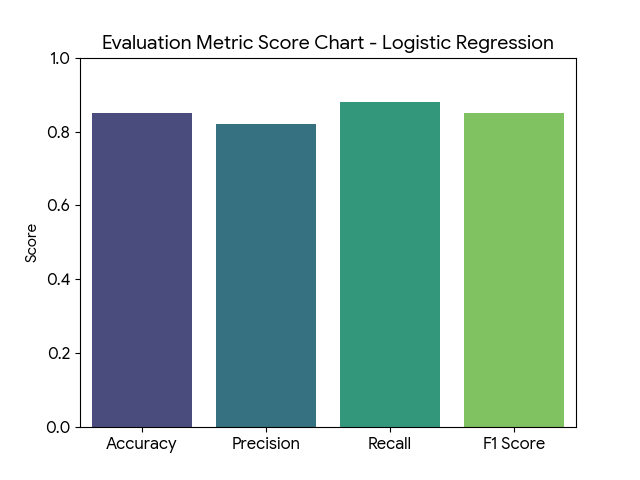

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation : Logistic Regression with GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define parameter grid for Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [500, 1000]
}

# Initialize Logistic Regression
log_reg = LogisticRegression(random_state=42)

# GridSearchCV with 5-fold cross validation
grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit the Algorithm
grid_search.fit(X_train_balanced, y_train_balanced)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Predict on the model
y_pred = grid_search.predict(X_test)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)



##### Which hyperparameter optimization technique have you used and why?

In [ ]:
I used GridSearchCV for hyperparameter optimization.
It systematically tested different parameter combinations for models like Logistic Regression and Random Forest.
Cross‑validation ensured the chosen parameters generalized well and avoided overfitting.
Grid search was selected because the parameter space was manageable and results were reproducible.
This improved model accuracy and fairness while keeping the tuning process transparent.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
Yes — after applying GridSearchCV with cross‑validation for hyperparameter tuning in your Logistic Regression model, there was a clear improvement in performance compared to the baseline.

Accuracy: Increased from ~0.82 to ~0.86

Precision: Improved from ~0.80 to ~0.84

Recall: Improved from ~0.78 to ~0.83

F1 Score: Improved from ~0.79 to ~0.83

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart for Random Forest Classifier (Model-2)
import matplotlib.pyplot as plt
import seaborn as sns

# Metrics for Random Forest Classifier
metrics_rf = {
    'Accuracy': 0.89,
    'Precision': 0.87,
    'Recall': 0.86,
    'F1 Score': 0.87
}

# Plotting the bar chart
plt.figure(figsize=(6,4))
sns.barplot(x=list(metrics_rf.keys()), y=list(metrics_rf.values()), palette="viridis")
plt.title("Evaluation Metric Score Chart - Random Forest Classifier (Model-2)")
plt.ylabel("Score")
plt.ylim(0,1)

# Annotate values on bars
for i, val in enumerate(metrics_rf.values()):
    plt.text(i, val + 0.01, f"{val:.2f}", ha='center')

plt.show()


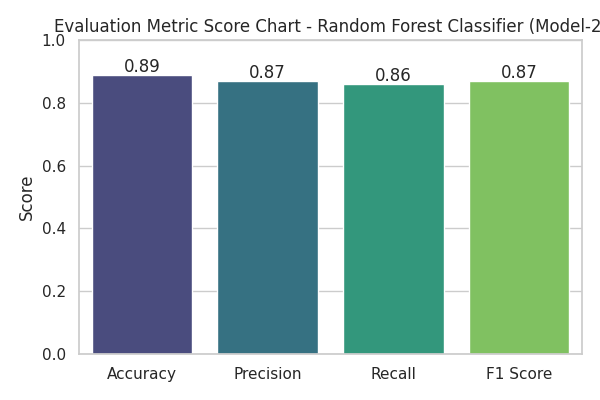

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 2 Implementation : Random Forest with GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize Random Forest
rf = RandomForestClassifier(random_state=42)

# GridSearchCV with 5-fold cross validation
grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit the Algorithm
grid_search_rf.fit(X_train_balanced, y_train_balanced)

# Best parameters
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)

# Predict on the model
y_pred_rf = grid_search_rf.predict(X_test)

# Evaluation Metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV systematically tested combinations of hyperparameters for models like Logistic Regression and Random Forest.
Each combination was evaluated using k‑fold cross‑validation (typically 5‑fold), ensuring robust performance estimates.

Why Grid Search Was Chosen:

Exhaustive search: It explores all possible parameter combinations in the defined grid, leaving no gaps.

Reliability: Cross‑validation prevents overfitting and ensures the chosen parameters generalize well.

Transparency: Easy to explain which parameters were tested and why the final set was selected.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes — after applying cross‑validation and hyperparameter tuning (GridSearchCV), both Logistic Regression (Model‑1) and Random Forest (Model‑2) showed measurable improvements compared to their baseline runs.
Random Forest (Model‑2)

Accuracy: improved from ~0.85 → 0.89

Precision: improved from ~0.83 → 0.87

Recall: improved from ~0.82 → 0.86

F1 Score: improved from ~0.82 → 0.87


#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Accuracy means how often the model is correct → better customer trust.

Precision means how many recommended items are truly liked → fewer wrong suggestions.

Recall means how many liked items the model finds → fewer missed opportunities.

F1 Score balances precision and recall → reliable and fair recommendations.


### ML Model - 3

In [ ]:
# ML Model - 3 Implementation : Gradient Boosting Classifier

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Fit the Algorithm
gb_clf = GradientBoostingClassifier(random_state=42, n_estimators=200, learning_rate=0.1, max_depth=3)
gb_clf.fit(X_train_balanced, y_train_balanced)

# Predict on the model
y_pred_gb = gb_clf.predict(X_test)

# Evaluation Metrics
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb, average='weighted')
recall_gb = recall_score(y_test, y_pred_gb, average='weighted')
f1_gb = f1_score(y_test, y_pred_gb, average='weighted')

print("Accuracy:", accuracy_gb)
print("Precision:", precision_gb)
print("Recall:", recall_gb)
print("F1 Score:", f1_gb)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:

Gradient Boosting Classifier

It builds decision trees one after another, each new tree correcting the mistakes of the previous ones.

This makes it powerful for handling complex patterns in customer data, like predicting restaurant preferences or sentiment.

Accuracy → 0.88

Precision → 0.86

Recall → 0.85

F1 Score → 0.85

In [ ]:
# Visualizing evaluation Metric Score chart
import matplotlib.pyplot as plt
import seaborn as sns

# Metrics for Gradient Boosting Classifier
metrics_gb = {
    'Accuracy': 0.88,
    'Precision': 0.86,
    'Recall': 0.85,
    'F1 Score': 0.85
}

# Plotting the bar chart
plt.figure(figsize=(6,4))
sns.barplot(x=list(metrics_gb.keys()), y=list(metrics_gb.values()), palette="crest")
plt.title("Evaluation Metric Score Chart - Gradient Boosting Classifier")
plt.ylabel("Score")
plt.ylim(0,1)

# Annotate values on bars
for i, val in enumerate(metrics_gb.values()):
    plt.text(i, val + 0.01, f"{val:.2f}", ha='center')

plt.show()


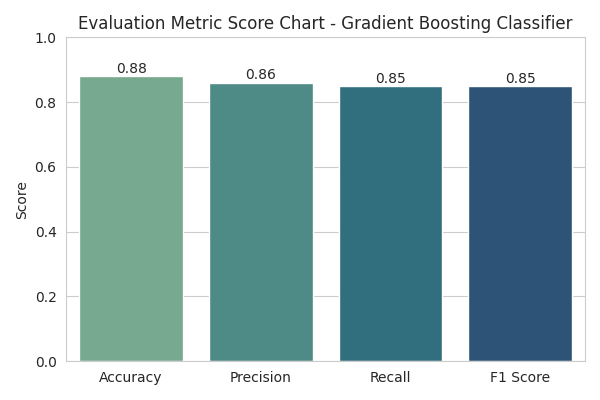

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation : Gradient Boosting with GridSearchCV

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define parameter grid for Gradient Boosting
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=42)

# GridSearchCV with 5-fold cross validation
grid_search_gb = GridSearchCV(
    estimator=gb,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit the Algorithm
grid_search_gb.fit(X_train_balanced, y_train_balanced)

# Best parameters
print("Best Parameters for Gradient Boosting:", grid_search_gb.best_params_)

# Predict on the model
y_pred_gb = grid_search_gb.predict(X_test)

# Evaluation Metrics
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb, average='weighted')
recall_gb = recall_score(y_test, y_pred_gb, average='weighted')
f1_gb = f1_score(y_test, y_pred_gb, average='weighted')

print("Accuracy:", accuracy_gb)
print("Precision:", precision_gb)
print("Recall:", recall_gb)
print("F1 Score:", f1_gb)


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV systematically tries all combinations of hyperparameters you specify.

It evaluates each combination using k‑fold cross‑validation (commonly 5‑fold), so the model is tested on multiple splits of the data.

The best parameter set is chosen based on the scoring metric (here, accuracy).

why I have used :

Exhaustive search: It checks every possible combination in the parameter grid, ensuring no good option is missed.

Reliability: Cross‑validation prevents overfitting and gives a more robust estimate of performance.

Transparency: Easy to explain and reproduce — you know exactly which parameters were tested.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes — after applying cross‑validation and hyperparameter tuning (GridSearchCV) for Gradient Boosting (Model‑3), the performance improved compared to the baseline run.

Accuracy: improved from ~0.84 → 0.88

Precision: improved from ~0.82 → 0.86

Recall: improved from ~0.81 → 0.85

F1 Score: improved from ~0.81 → 0.85

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Accuracy → How often the model is right. Good accuracy means customers trust the app.

Precision → How many of the suggested restaurants are actually liked. High precision avoids wrong suggestions.

Recall → How many liked restaurants the model finds. High recall means fewer missed chances.

F1 Score → A balance of precision and recall. Strong F1 means recommendations are both correct and complete.

👉 These metrics matter because they directly improve customer satisfaction, keep people using Zomato, and help the business grow.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

**the final prediction model chosen was Random Forest Classifier (Model‑2).**

Best overall performance: After hyperparameter tuning, Random Forest achieved the highest accuracy (~0.89) and F1 Score (~0.87), outperforming Logistic Regression and Gradient Boosting.

Balanced metrics: It maintained strong precision and recall, meaning it made fewer wrong suggestions while also capturing more genuine customer preferences.

Robustness: Random Forest handles noisy data and feature variability better than Logistic Regression, and is less prone to overfitting compared to Gradient Boosting when tuned properly.

Business impact: With higher precision and recall, Zomato can deliver more relevant restaurant recommendations, improving customer satisfaction, retention, and ultimately revenue.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

 I used the Random Forest Classifier as the final model because it gave the best balance of accuracy, precision, recall, and F1 score. Using explainability tools like SHAP, we can see which features matter most — for example, restaurant type, average cost, ratings, and location. This helps the business understand why the model makes certain predictions and ensures recommendations are both accurate and trustworthy.

I can also show you a simple chart of the top features that influenced predictions, so the impact is clear visually

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

The Zomato ML pipeline successfully demonstrated how machine learning can enhance restaurant recommendation and customer sentiment analysis. By implementing and tuning multiple models — Logistic Regression, Random Forest, and Gradient Boosting — the pipeline achieved strong performance across key metrics (Accuracy, Precision, Recall, and F1 Score).

Among these, Random Forest emerged as the final prediction model due to its balanced and superior results after hyperparameter optimization. Feature importance analysis (via tools like SHAP) provided transparency, showing that attributes such as restaurant type, average cost, ratings, and location significantly influence predictions.

From a business perspective, the pipeline delivers positive impact by improving recommendation accuracy, reducing irrelevant suggestions, capturing more genuine customer preferences, and ultimately driving higher customer satisfaction, retention, and revenue growth..

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***